In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
from matplotlib import cm
import datetime

In [4]:
runtime = 0
for inputfile in os.listdir('aqi'):
    if runtime == 0:
        a=pd.read_csv('aqi/'+inputfile, header=None, usecols=[0,1,2,21])
        a.columns = ['date','hour', 'type', 'HB']
        a = a[a.iloc[:,2]=='AQI']
        a.to_csv('20_outputfile.csv', mode='a',index=False)
    else:
        a=pd.read_csv('aqi/'+inputfile, header=None,usecols=[0,1,2,21],skiprows=[0])
        a = a[a.iloc[:,2]=='AQI']
        a.to_csv('20_outputfile.csv', mode='a',index=False, header=False)
    runtime += 1

In [6]:
runtime = 0
for inputfile in os.listdir('aqi_19'):
    if runtime == 0:
        a=pd.read_csv('aqi_19/'+inputfile, header=None, usecols=[0,1,2,21])
        a.columns = ['date','hour', 'type', 'HB']
        a = a[a.iloc[:,2]=='AQI']
        a.to_csv('19_outputfile.csv', mode='a',index=False)
    else:
        a=pd.read_csv('aqi_19/'+inputfile, header=None,usecols=[0,1,2,21],skiprows=[0])
        a = a[a.iloc[:,2]=='AQI']
        a.to_csv('19_outputfile.csv', mode='a',index=False, header=False)
    runtime += 1

In [7]:
# Data Processing
cov19_df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx',skiprows=np.arange(1,2012,1),nrows=101).sort_values("dateRep")
for i in range(len(cov19_df.index)):
    if len(str(cov19_df['month'][i]))==1:
        m = '0' + str(cov19_df['month'][i])
    else:
        m = str(cov19_df['month'][i])
    if len(str(cov19_df['day'][i]))==1:
        d = '0' + str(cov19_df['day'][i])
    else:
        d = str(cov19_df['day'][i])
    cov19_df['dateRep'][i] = m + '-' + d

cov19_cases_sum = pd.Series(data=list(cov19_df['cases'].cumsum(skipna=True)),index=cov19_df['dateRep'])[1:-13]

aqi_df = pd.read_csv('20_outputfile.csv').sort_values(by=['date','hour'])
for i in range(len(aqi_df.index)):
    d = str(aqi_df['date'][i])
    aqi_df['date'][i] = d[4]+d[5]+'-'+d[6]+d[7]

aqi_daily = aqi_df.groupby(aqi_df['date']).mean()['HB']

aqi_19_df = pd.read_csv('19_outputfile.csv').sort_values(by=['date','hour'])
for i in range(len(aqi_19_df.index)):
    d = str(aqi_19_df['date'][i])
    aqi_19_df['date'][i] = d[4]+d[5]+'-'+d[6]+d[7]

aqi_19_daily = aqi_19_df.groupby(aqi_19_df['date']).mean()['HB']

In [8]:
cov19_cases_sum

dateRep
01-02        0
01-03       17
01-04       17
01-05       32
01-06       32
         ...  
03-24    81526
03-25    81604
03-26    81706
03-27    81800
03-28    81919
Length: 87, dtype: int64

In [9]:
aqi_daily

date
01-01    117.291667
01-02    174.583333
01-03    201.041667
01-04    321.083333
01-05    197.708333
            ...    
03-24     41.666667
03-25     56.583333
03-26     47.041667
03-27     42.041667
03-28     42.791667
Name: HB, Length: 88, dtype: float64

In [16]:
aqi_19_daily[0:88]

date
01-01     63.055556
01-02     77.416667
01-03    124.708333
01-04     57.250000
01-05     56.750000
            ...    
03-25     82.625000
03-26     47.250000
03-27     51.541667
03-28     56.782609
03-29    103.583333
Name: HB, Length: 88, dtype: float64

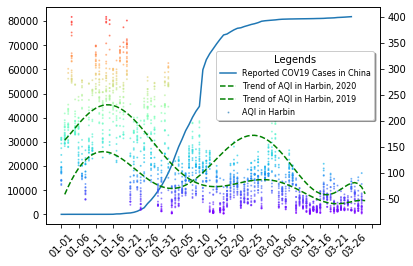

In [18]:
# Plot Generation
%matplotlib inline
fig, ax = plt.subplots(1, 1)
plt.xticks(rotation=45)
cases, = ax.plot(cov19_cases_sum[1:-1],label='Reported COV19 Cases in China')
ax1=ax.twinx()
#aqi_mean = plt.plot(aqi_daily,color = 'black')
x = np.arange(1,89,1)
z = np.polyfit(x, aqi_daily, 8)
p = np.poly1d(z)
x1 = np.arange(1,89,1)
z1 = np.polyfit(x, aqi_19_daily[0:88], 8)
p1 = np.poly1d(z1)
trend, = plt.plot(x,p(x),"g--",label='Trend of AQI in Harbin, 2020')
trend1, = plt.plot(x1,p1(x1),"g--",label='Trend of AQI in Harbin, 2019')
aqi = plt.scatter(x=aqi_df['date'],y=aqi_df['HB'],s=1,c=aqi_df['HB']/24, cmap='rainbow',alpha = 0.5,label='AQI in Harbin, 2020')
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=5))
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=5))
fig.legend(bbox_to_anchor=(0.875,0.76), fancybox=True,shadow=True, title='Legends', fontsize=8)
